## 리뷰 기반 분류(자연어처리 프로세스)

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re


In [4]:
df = pd.read_csv("./data/women review.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 데이터 확인 및 전처리

In [8]:
df_clean = df.drop(columns = ['Unnamed: 0'])

In [9]:
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [14]:
df_clean = df_clean[~df_clean['Review Text'].isnull()] # Review Text 결측값 처리

In [17]:
df_clean_title = df_clean[~df_clean['Title'].isnull()] #title 결측값 삭제
tokens = re.findall("[\w']+", df_clean_title['Title'].str.lower().str.cat(sep=' ')) #공백기준 토큰화

en_stops = set(stopwords.words('english'))

filtered_sentence = [token for token in tokens if not token in en_stops] # stopwords해당 안하는거만
filtered_sentence

['major',
 'design',
 'flaws',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'lots',
 'flattering',
 'fun',
 'dress',
 'dress',
 'looks',
 'like',
 'made',
 'cheap',
 'material',
 'perfect',
 'runs',
 'big',
 'pretty',
 'party',
 'dress',
 'issues',
 'nice',
 'body',
 'need',
 'least',
 'average',
 'height',
 'taller',
 'looks',
 'great',
 'white',
 'pants',
 'super',
 'cute',
 'cozy',
 'stylish',
 'comfortable',
 'cute',
 'crisp',
 'shirt',
 "i'm",
 'torn',
 'looks',
 'like',
 'like',
 'love',
 'versatile',
 'falls',
 'flat',
 'huge',
 'disappointment',
 'loved',
 'returned',
 'great',
 'shirt',
 'great',
 'layering',
 'piece',
 'cuter',
 'oerson',
 'love',
 'pants',
 'mehh',
 'love',
 'dress',
 'lovely',
 'beautifully',
 'cut',
 'lightweight',
 'coat',
 'soft',
 'lovely',
 'things',
 'know',
 'beautiful',
 'love',
 'two',
 'tone',
 'design',
 'love',
 'color',
 'love',
 'embroidery',
 'cute',
 'fall',


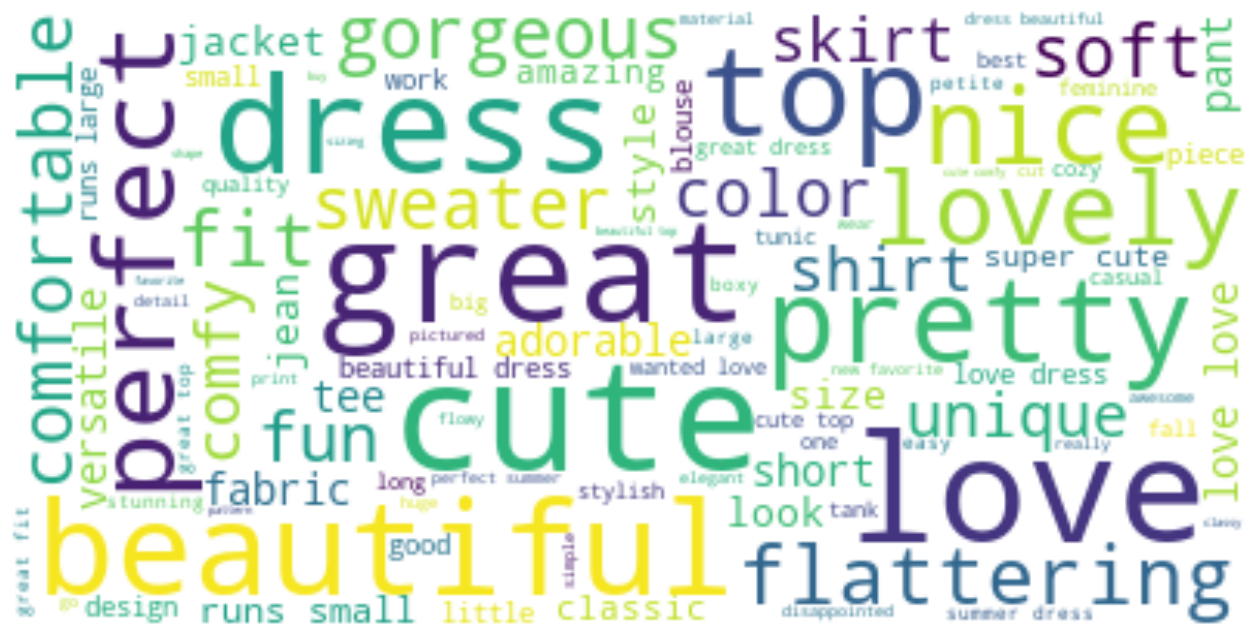

In [18]:
plt.rcParams['figure.figsize'] = (16, 16) # 출력 사이즈
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(filtered_sentence)) 
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean['Review Text'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 "i'm",
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 "5'8",
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',

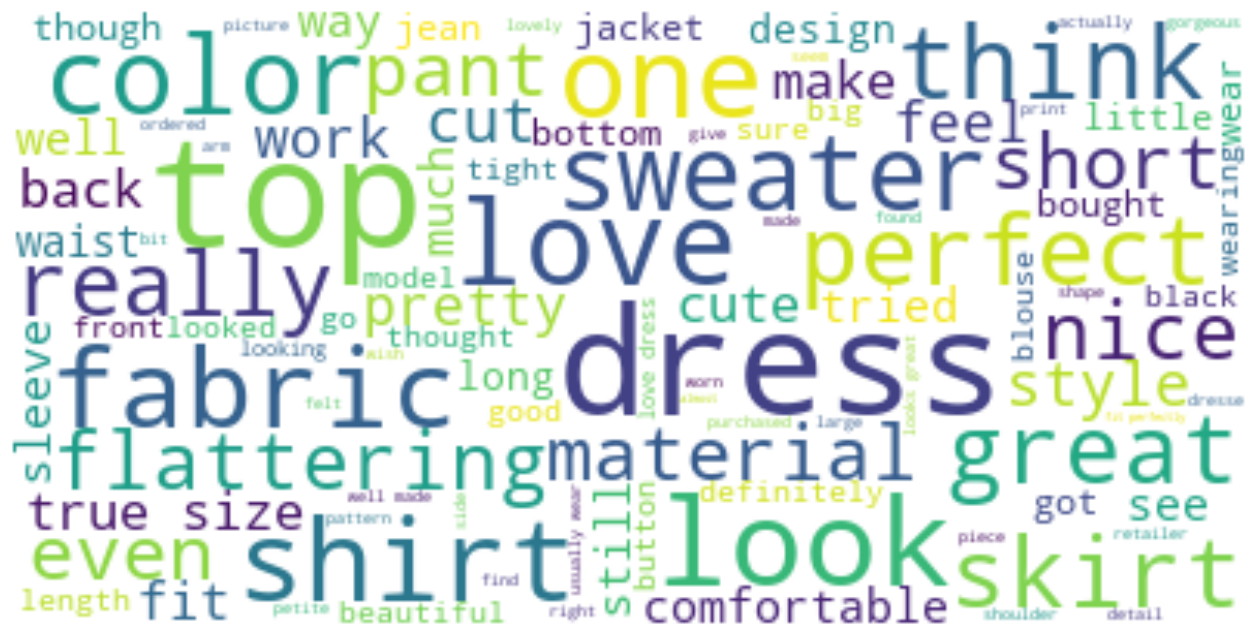

In [20]:
plt.rcParams['figure.figsize'] = (16, 16)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## 자연어 처리 Tfidf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english') # TfidfVectorizer을 불러옴 (stop_words 는 영어로 설정)
X = vectorizer.fit_transform(df_clean['Review Text'].str.lower()) # 소문자화 'Review Text'데이터를 Tfidf로 변환
X.shape

(22641, 13855)

In [24]:
y = df_clean['Recommended IND'] # 예측해야 할 변수 'Recommended IND' 만을 선택하여 numpy 형태로 y에 저장
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용
y.shape

(22641,)

In [32]:
vectorizer.vocabulary_ #review 텍스트 vector적용시킨거 토큰별로 딕셔너리 형태로 나옴

{'absolutely': 581,
 'wonderful': 13630,
 'silky': 10928,
 'sexy': 10683,
 'comfortable': 2788,
 'love': 7257,
 'dress': 4035,
 'sooo': 11292,
 'pretty': 9339,
 'happened': 5725,
 'store': 11630,
 'glad': 5421,
 'did': 3701,
 'bc': 1446,
 'ordered': 8431,
 'online': 8363,
 'petite': 8888,
 'bought': 1845,
 'length': 6986,
 'hits': 5930,
 'just': 6667,
 'little': 7137,
 'knee': 6754,
 'definitely': 3537,
 'true': 12678,
 'midi': 7671,
 'truly': 12680,
 'high': 5883,
 'hopes': 6000,
 'really': 9722,
 'wanted': 13315,
 'work': 13654,
 'initially': 6336,
 'small': 11148,
 'usual': 13091,
 'size': 10986,
 'outrageously': 8496,
 'fact': 4642,
 'zip': 13838,
 'reordered': 9954,
 'medium': 7578,
 'ok': 8343,
 'overall': 8514,
 'half': 5676,
 'fit': 4883,
 'nicely': 8123,
 'tight': 12410,
 'layer': 6908,
 'somewhat': 11284,
 'cheap': 2409,
 'net': 8096,
 'layers': 6912,
 'imo': 6199,
 'major': 7381,
 'design': 3634,
 'flaw': 4951,
 'sewn': 10678,
 'directly': 3767,
 'zipper': 13842,
 'jumpsuit'

## 분리 및 학습 

In [26]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손 쉽게 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB-M', MultinomialNB()))  # 멀티노미얼 나이브 베이즈
models.append(('NB-B', BernoulliNB()))  # 베르누이 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

KNN - train_score : 0.885987, test score : 0.831972
NB-M - train_score : 0.836020, test score : 0.814749
NB-B - train_score : 0.907078, test score : 0.866416
RF - train_score : 1.000000, test score : 0.839921
SVM - train_score : 0.821996, test score : 0.806359
XGB - train_score : 0.946720, test score : 0.868404


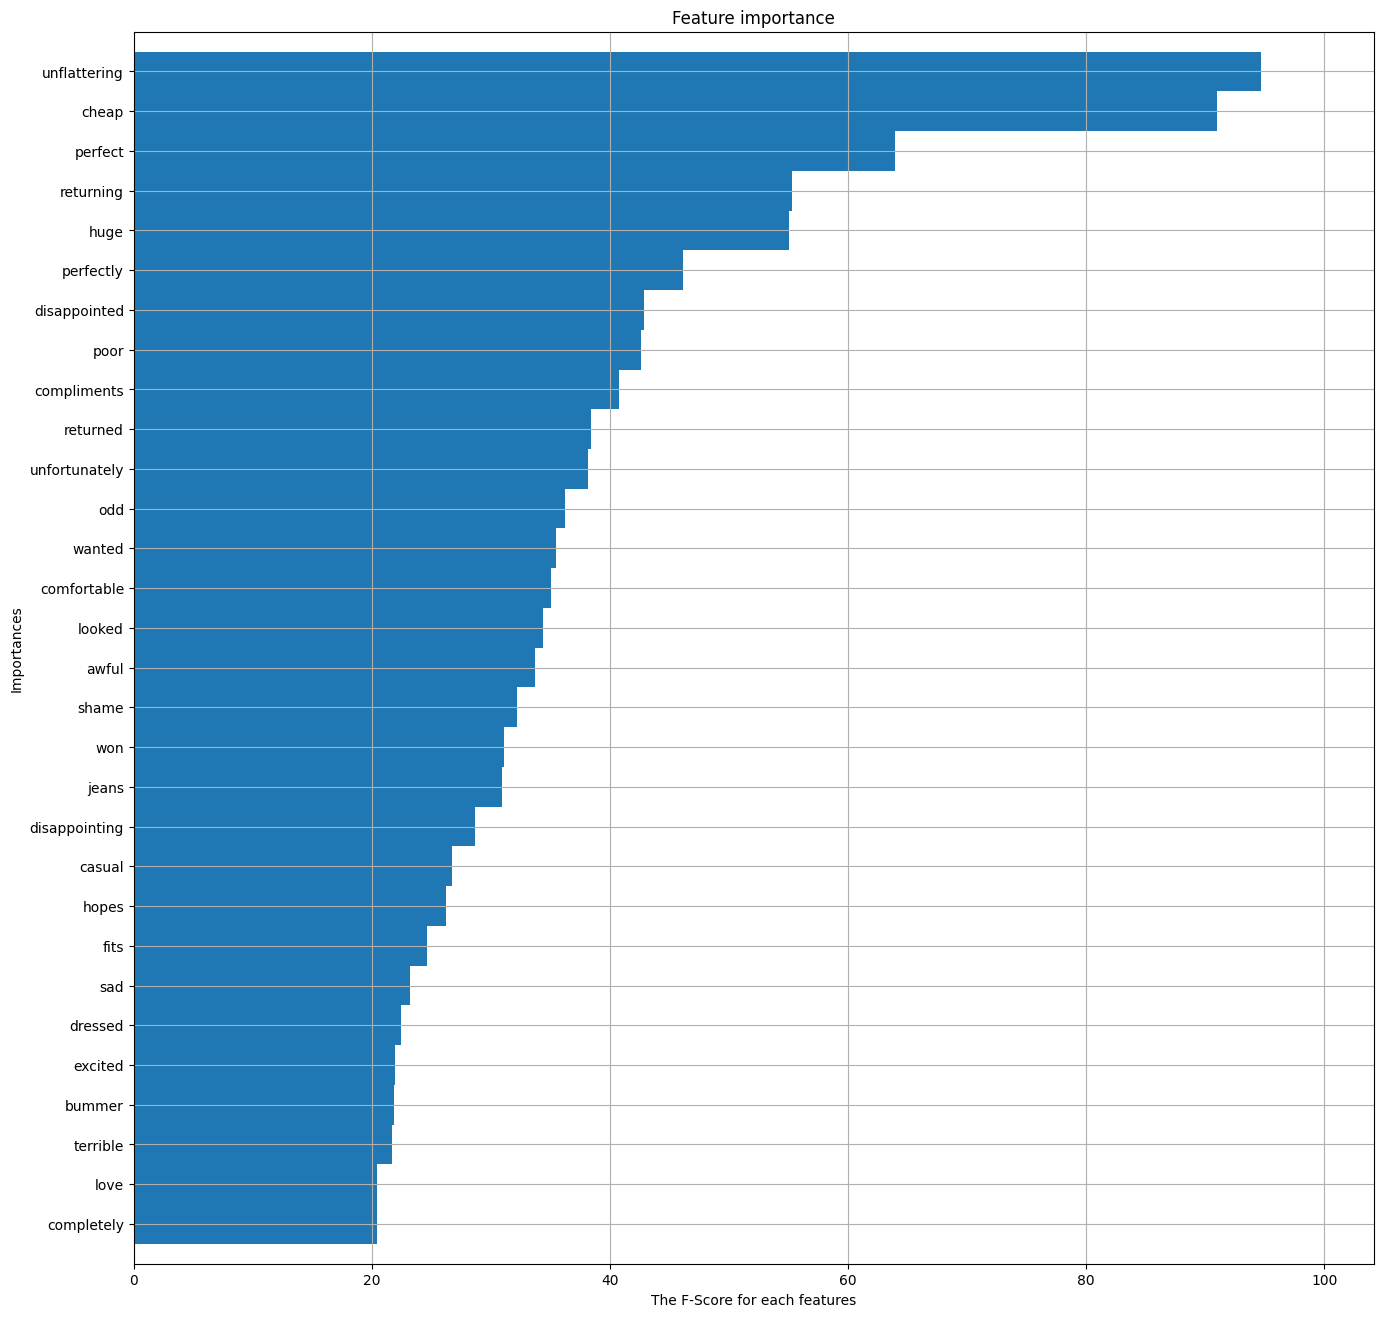

In [33]:
# xgb 모델에서 변수 중요도를 출력
max_num_features = 30
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)

# 그림에 단어를 표기해주기 위한 코드
ytick = ax.get_yticklabels()
word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names_out()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

# 그림 
plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

## 평가 

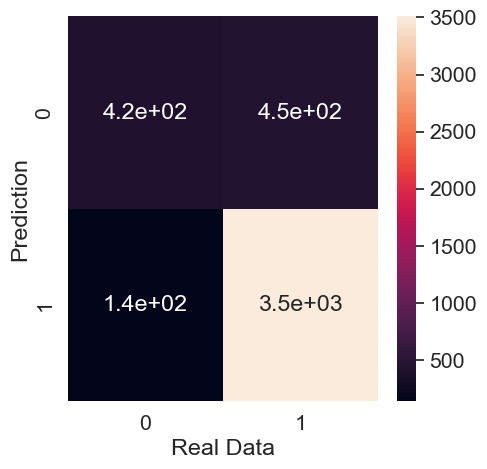

array([[ 423,  454],
       [ 142, 3510]], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix

# 의사결정나무 모델에 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장합니다.
model_predition = models[-1][1].predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
x_cm = confusion_matrix(y_test, model_predition)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(x_cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()
x_cm

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력합니다.
print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.9611171960569551
Precision score: 0.8854692230070635


## 확인

In [38]:
# 0번부터 4번까지 5개를 출력해보겠습니다.
for i in range(3): 
    
    # 의사결정나무 모델을 사용하였습니다.
    prediction = model.predict(x_test[i])
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, df_clean['Review Text'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터 문장: 
Absolutely wonderful - silky and sexy and comfortable
0 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1

1 번째 테스트 데이터 문장: 
Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
1 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1

2 번째 테스트 데이터 문장: 
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
2 번째 테스트 데이터의 예측 